In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
X  = boston.data
Y  = boston.target
print(X.shape,Y.shape)

(506, 13) (506,)


In [4]:
def standardScaler(dataset):
    mean = np.mean(dataset,axis=0)
    std = np.std(dataset,axis=0)
    return (dataset-mean)/std
X = standardScaler(X)

In [5]:
n_train_samples = X.shape[0]
n_features = X.shape[1]
#append bias
X_f = np.c_[np.ones(n_train_samples),X] #np.c_ to append axis
Y_f = np.reshape(Y,[n_train_samples,1]) #reshape labels

In [6]:
#train validation split
random_indices = np.random.rand(n_train_samples) < 0.80
X_train = X_f[random_indices]
Y_train = Y_f[random_indices]
X_validation = X_f[~random_indices]
Y_validation = Y_f[~random_indices]
print(X_train.shape,Y_train.shape,X_validation.shape,Y_validation.shape)

(392, 14) (392, 1) (114, 14) (114, 1)


In [7]:
import tensorflow as tf

learning_rate = 0.01
epochs = 1000
cost_history = np.empty(shape=[0],dtype=float)

X = tf.placeholder(tf.float64,[None,n_features+1])
Y = tf.placeholder(tf.float64,[None,1])
W = tf.Variable(tf.ones([n_features+1,1],dtype=np.float64),dtype=tf.float64)

init = tf.global_variables_initializer()

In [8]:
#all magic happens here
y_ = tf.matmul(X,W)
cost = tf.reduce_mean(tf.square(y_-Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [9]:
#initialize Session
sess = tf.Session()
sess.run(init)

pred_y = sess.run(y_, feed_dict={X: X_validation})
mse = tf.reduce_mean(tf.square(pred_y - Y_validation))
print("MSE : {}".format(sess.run(mse)))

for epoch in range(epochs):
    sess.run(training_step,feed_dict={X:X_train,Y:Y_train})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X:X_train,Y:Y_train}))

MSE : 594.8742030185562


Text(0,0.5,'Cost')

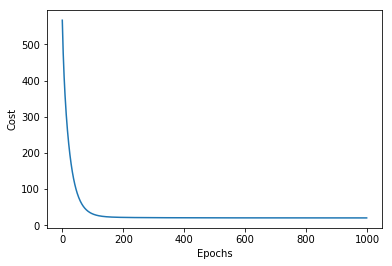

In [10]:
plt.plot(range(epochs),cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")

In [11]:
pred_y = sess.run(y_, feed_dict={X: X_validation})
mse = tf.reduce_mean(tf.square(pred_y - Y_validation))
print("MSE : {}".format(sess.run(mse)))

MSE : 29.626359855835346


In [11]:
sess.close()